In [458]:
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [459]:
pd.set_option('display.max_columns', None)
current_dir = os.getcwd()

# Selección de 516 productos a través de todas las fechas, y aprox 10 millones de filas 

#### 10 millones de filas 516 productos

In [461]:
# import pandas as pd
# from collections import defaultdict
# import math

# # Parámetros

# chunk_size = 100000  # Tamaño del chunk, ajusta según tu memoria
# total_data_path = os.path.join(current_dir, '../data/raw/total_data.csv')
# target_rows = 1000000  # Objetivo de filas
# min_items = 50  # Mínimo de artículos deseados

# # Paso 1: Identificar todas las fechas únicas

# all_dates = set()

# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['date']):
#     chunk_dates = set(chunk['date'].unique())
#     all_dates.update(chunk_dates)
# all_dates = sorted(list(all_dates))

# print(f"Total de fechas únicas: {len(all_dates)}")
# print(f"Rango de fechas: desde {all_dates[0]} hasta {all_dates[-1]}")

# # Paso 2: Encontrar artículos que aparecen en todas las fechas

# item_date_counts = defaultdict(set)

# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id', 'date']):
#     for item, date in zip(chunk['item_id'], chunk['date']):
#         item_date_counts[item].add(date)
# items_in_all_dates = [item for item, dates in item_date_counts.items() if len(dates) == len(all_dates)]

# print(f"Total de artículos que aparecen en todas las fechas: {len(items_in_all_dates)}")

# # Paso 3: Calcular cuántos artículos seleccionar para alcanzar ~1M filas

# D = len(all_dates)
# N = max(min_items, math.ceil(target_rows / D))  # Asegura al menos 500 artículos

# if len(items_in_all_dates) < N:
#     print(f"Advertencia: Solo hay {len(items_in_all_dates)} artículos disponibles, menos que los {N} calculados.")
#     N = len(items_in_all_dates)
# selected_items = items_in_all_dates[:N]

# print(f"Seleccionados {N} artículos para alcanzar aproximadamente {N * D} filas.")

# # Paso 4: Filtrar el dataset con los artículos seleccionados

# filtered_data = []

# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
#     filtered_chunk = chunk[chunk['item_id'].isin(selected_items)]
#     filtered_data.append(filtered_chunk)
# final_data = pd.concat(filtered_data, ignore_index=True)

# # Verificaciones finales

# print(f"Total de filas en el dataset filtrado: {len(final_data)}")
# print(f"Total de item_id únicos: {final_data['item_id'].nunique()}")
# print(f"Rango de fechas en el dataset filtrado: desde {final_data['date'].min()} hasta {final_data['date'].max()}")

#### 1 millon de filas forzado

In [462]:
# import pandas as pd
# from collections import defaultdict
# import math
# import os
# # Parámetros
# chunk_size = 100_000
# total_data_path = os.path.join(current_dir, '../data/raw/total_data.csv')
# target_rows = 1000000  # Objetivo de filas
# min_items = 50  # Mínimo de productos
# # Paso 1: Obtener todas las fechas únicas
# all_dates = set()
# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['date']):
#     all_dates.update(chunk['date'].unique())
# all_dates = sorted(list(all_dates))
# D = len(all_dates)
# # Paso 2: Identificar los artículos que aparecen en todas las fechas
# item_date_counts = defaultdict(set)
# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id', 'date']):
#     for item, date in zip(chunk['item_id'], chunk['date']):
#         item_date_counts[item].add(date)
# # Filtrar productos que están en todas las fechas
# items_in_all_dates = [item for item, dates in item_date_counts.items() if len(dates) == D]
# # Número de productos a seleccionar (limitamos para ajustar a 1 millón de filas)
# N = max(min_items, math.ceil(target_rows / D))
# if len(items_in_all_dates) < N:
#     print(f":advertencia: Solo hay {len(items_in_all_dates)} productos válidos, usando todos ellos.")
#     N = len(items_in_all_dates)
# # Seleccionamos los productos
# selected_items = items_in_all_dates[:N]
# print(f"Seleccionados {N} productos que aparecen en todas las fechas.")
# # Paso 3: Filtrar el dataset completo con los productos seleccionados
# filtered_data = []
# for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
#     chunk_filtrado = chunk[
#         (chunk['item_id'].isin(selected_items)) &
#         (chunk['date'].isin(all_dates))  # Mantener todas las fechas
#     ]
#     filtered_data.append(chunk_filtrado)
# final_data = pd.concat(filtered_data, ignore_index=True)
# # Verificación final
# print(f"\n:marca_de_verificación_blanca: Dataset final:")
# print(f"Filas totales: {len(final_data):,}")
# print(f"Items únicos: {final_data['item_id'].nunique()}")
# print(f"Fechas únicas: {final_data['date'].nunique()}")
# # Si el número de filas excede el objetivo, limitamos a 1 millón
# if len(final_data) > target_rows:
#     final_data = final_data.sample(n=target_rows, random_state=42)
#     print(f":advertencia: El dataset ha sido reducido a {target_rows} filas.")
# # Guardar el dataset final filtrado como CSV (si es necesario)
# final_data.to_csv(os.path.join(current_dir, '../data/csv_model/final_data_filtered.csv'), index=False)

#### 1 tienda - 10 productos por fecha (XGBoost)

In [559]:
import pandas as pd
from collections import defaultdict
import math
import os
# Parámetros
chunk_size = 100_000
total_data_path = os.path.join(current_dir, '../data/raw/total_data.csv')
target_rows = 1000000  # Objetivo de filas
min_items = 10  # Mínimo de productos
store_id_selected = 'CA_1'  # Tu store_id específico, por ejemplo 'CA_1'
# Paso 1: Obtener todas las fechas únicas
all_dates = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['date']):
    all_dates.update(chunk['date'].unique())
all_dates = sorted(list(all_dates))
D = len(all_dates)
print(f"Total de fechas únicas: {D}")
# Paso 2: Identificar los artículos que aparecen en todas las fechas para la tienda seleccionada
item_date_counts = defaultdict(set)
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id', 'date', 'store_id']):
    # Filtrar solo por la tienda seleccionada
    chunk['store_id'] = chunk['store_id'].astype(str)  # Convertir store_id a string para asegurar compatibilidad
    chunk_filtrado = chunk[chunk['store_id'] == store_id_selected]
    for item, date in zip(chunk_filtrado['item_id'], chunk_filtrado['date']):
        item_date_counts[item].add(date)
# Filtrar productos que están en todas las fechas
items_in_all_dates = [item for item, dates in item_date_counts.items() if len(dates) == D]
# Número de productos a seleccionar (limitamos a 50 productos)
N = min(min_items, len(items_in_all_dates))  # Solo seleccionamos 50 productos si hay suficientes
# Si hay menos de 50 productos, usar todos los disponibles
selected_items = items_in_all_dates[:N]
print(f"Seleccionados {N} productos que aparecen en todas las fechas de la tienda {store_id_selected}.")
# Paso 3: Filtrar el dataset completo con los productos seleccionados y la tienda seleccionada
filtered_data_xgboost = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    # Asegurarse de que `store_id` y otros valores estén en formato de cadena
    chunk['store_id'] = chunk['store_id'].astype(str)  # Convertir `store_id` a string
    chunk_filtrado = chunk[
        (chunk['item_id'].isin(selected_items)) &
        (chunk['date'].isin(all_dates)) &  # Mantener todas las fechas
        (chunk['store_id'] == store_id_selected)  # Filtrar por la tienda seleccionada
    ]
    filtered_data_xgboost.append(chunk_filtrado)
# Concatenar los chunks filtrados
final_data = pd.concat(filtered_data_xgboost, ignore_index=True)
# Verificación final
print(f"\nDataset final:")
print(f"Filas totales: {len(final_data):,}")
print(f"Items únicos: {final_data['item_id'].nunique()}")
print(f"Fechas únicas: {final_data['date'].nunique()}")
print(f"Tienda seleccionada: {store_id_selected}")
# Si el número de filas excede el objetivo, limitamos a 1 millón
if len(final_data) > target_rows:
    final_data = final_data.sample(n=target_rows, random_state=42)
    print(f":advertencia: El dataset ha sido reducido a {target_rows} filas.")
# # Guardar el dataset final filtrado como CSV (si es necesario)
# final_data.to_csv(os.path.join(current_dir, '../data/csv_model/final_data_filtered.csv'), index=False)

Total de fechas únicas: 1941
Seleccionados 10 productos que aparecen en todas las fechas de la tienda CA_1.


C:\Users\andta\AppData\Local\Temp\ipykernel_10668\2970380631.py:35: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_10668\2970380631.py:35: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_10668\2970380631.py:35: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_10668\2970380631.py:35: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
C:\Users\andta\AppData\Local\Temp\ipykernel_


Dataset final:
Filas totales: 19,410
Items únicos: 10
Fechas únicas: 1941
Tienda seleccionada: CA_1


In [560]:
final_data["item_id"].nunique()

10

In [561]:

final_data["item_id"].count()

np.int64(19410)

#### Guardar en csv (1 Millon de filas)

In [562]:


final_data_path = os.path.join(current_dir, '../data/raw/final_data.csv')

final_data.to_csv(final_data_path, index=False)

In [563]:
final_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


#### Revision columnas

In [564]:
print(final_data.id.nunique())
print(final_data.id.isnull().sum())
print(final_data.id.dtype)

10
0
object


In [565]:
with open("resumen_columnas.txt", "w") as f:
    for col in final_data.columns:
        unicos = final_data[col].nunique()
        nulos = final_data[col].isnull().sum()
        tipo = final_data[col].dtype

        f.write(f"Columna: {col}\n")
        f.write(f"  Valores únicos: {unicos}\n")
        f.write(f"  Valores nulos: {nulos}\n")
        f.write(f"  Tipo de dato: {tipo}\n")
        f.write("\n")


### Procesamiento de los datos

#### Preprocesamiento de la columna `date`

In [566]:
# Convertir la columna 'date' a formato datetime
final_data['date'] = pd.to_datetime(final_data['date'])

# Extraer características de la fecha
final_data['day_of_week'] = final_data['date'].dt.dayofweek  # Día de la semana (0 = lunes, 6 = domingo)
final_data['is_weekend'] = final_data['day_of_week'].isin([5, 6]).astype(int)  # Fin de semana (1 = sí, 0 = no)
final_data['month'] = final_data['date'].dt.month  # Mes
final_data['quarter'] = final_data['date'].dt.quarter  # Trimestre


### Procesamiento de valores nulos

In [567]:
# Rellenar valores nulos con 0 o con el valor medio de la columna
final_data['event_name_1'].fillna('No Event', inplace=True)
final_data['event_type_1'].fillna('No Type', inplace=True)
final_data['event_name_2'].fillna('No Event', inplace=True) 
final_data['event_type_2'].fillna('No Type', inplace=True)

C:\Users\andta\AppData\Local\Temp\ipykernel_10668\1541185424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['event_name_1'].fillna('No Event', inplace=True)
C:\Users\andta\AppData\Local\Temp\ipykernel_10668\1541185424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [568]:
# Rellenar valores nulos en 'sell_price' con el último valor conocido para cada item_id y store_id
final_data['sell_price'] = final_data.groupby(['item_id', 'store_id'])['sell_price'].ffill()

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())



3234


In [569]:
# Rellenar valores nulos en 'sell_price' con el siguiente valor conocido para cada item_id y store_id
final_data['sell_price'] = final_data.groupby(['item_id', 'store_id'])['sell_price'].bfill()

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())


0


In [570]:
# Rellenar los valores nulos restantes con la media de sell_price
mean_sell_price = final_data['sell_price'].mean()
final_data['sell_price'].fillna(mean_sell_price, inplace=True)

# Verificamos que no haya más valores nulos
print(final_data['sell_price'].isnull().sum())


0


C:\Users\andta\AppData\Local\Temp\ipykernel_10668\1176023560.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data['sell_price'].fillna(mean_sell_price, inplace=True)


### Escalar la variable `sell_price`

In [571]:
scaler = StandardScaler()
final_data['scaled_sell_price'] = scaler.fit_transform(final_data[['sell_price']])

In [572]:
final_data.date.min()

Timestamp('2011-01-29 00:00:00')

In [573]:
final_data.date.max()

Timestamp('2016-05-22 00:00:00')

In [574]:
final_data.state_id.value_counts()

state_id
CA    19410
Name: count, dtype: int64

### Unificando Macrodatos con final_data

In [575]:
personal_income_path = os.path.join(current_dir, "../data/raw/macrodata/personal_income.csv")
population_density_path = os.path.join(current_dir, "../data/raw/macrodata/population_density.csv")
population_growth_path = os.path.join(current_dir, "../data/raw/macrodata/population_growth.csv")
riqueza_per_capita_path = os.path.join(current_dir, "../data/raw/macrodata/riqueza_per_capita.csv")
wti_crude_oil_path = os.path.join(current_dir, "../data/raw/macrodata/wti_crude_oil.csv")
pib_por_estados_path = os.path.join(current_dir, "../data/raw/macrodata/pib_por_estados.csv")

personal_income = pd.read_csv(personal_income_path)
population_density = pd.read_csv(population_density_path)
population_growth = pd.read_csv(population_growth_path)
riqueza_per_capita = pd.read_csv(riqueza_per_capita_path)
wti_crude_oil = pd.read_csv(wti_crude_oil_path)
pib_por_estados = pd.read_csv(pib_por_estados_path)


In [576]:
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274


#### Merge de final_data con personal_income

In [577]:
personal_income

,State,pi_mean_2011,pi_mean_2012,pi_mean_2013,pi_mean_2014,pi_mean_2015,pi_mean_2016
0,CA,2.954186e+07,3.128902e+07,3.173940e+07,3.371928e+07,3.615603e+07,3.777824e+07
1,TX,4.231724e+06,4.499557e+06,4.621053e+06,4.951337e+06,5.043977e+06,5.024924e+06
2,WI,3.330011e+06,3.470573e+06,3.488184e+06,3.621579e+06,3.777543e+06,3.844672e+06


In [578]:
# 1. Convertir personal_income a formato largo
income_long = personal_income.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='pi_mean')
# 2. Limpiar la columna 'year' para que sea un entero
income_long['year'] = income_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
income_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(income_long, on=['state_id', 'year'], how='left')
final_data


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07


#### Merge de final_data con population_density

In [579]:
population_density

,State,poblacion_2011,poblacion_2012,poblacion_2013,poblacion_2014,poblacion_2015,poblacion_2016
0,CA,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0
1,TX,25645629.0,26084481.0,26480266.0,26964333.0,27470056.0,27914410.0
2,WI,5705288.0,5719960.0,5736754.0,5751525.0,5760940.0,5772628.0


In [580]:
# 1. Convertir population_density a formato largo
population_den_long = population_density.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='poblacion')
# 2. Limpiar la columna 'year' para que sea un entero
population_den_long['year'] = population_den_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
population_den_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(population_den_long, on=['state_id', 'year'], how='left')
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07,39167117.0
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07,39167117.0
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07,39167117.0
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07,39167117.0


#### Merge de final_data con population_growth

In [581]:
population_growth

,State,Crecimiento_p_2011,Crecimiento_p_2012,Crecimiento_p_2013,Crecimiento_p_2014,Crecimiento_p_2015,Crecimiento_p_2016
0,CA,0.82,0.82,0.88,0.83,0.64,0.49
1,TX,1.71,1.52,1.83,1.88,1.62,1.36
2,WI,0.26,0.29,0.26,0.16,0.20,0.30


In [582]:
# 1. Convertir population_growth a formato largo
population_growth_long = population_growth.melt(id_vars='State', 
                                    var_name='year', 
                                    value_name='Crecimiento_p')
# 2. Limpiar la columna 'year' para que sea un entero
population_growth_long['year'] = population_growth_long['year'].str.extract(r'(\d{4})').astype(int)

# 3. Renombrar 'State' a 'state_id' para evitar duplicados
population_growth_long.rename(columns={'State': 'state_id'}, inplace=True)

# 4. Merge
final_data = final_data.merge(population_growth_long, on=['state_id', 'year'], how='left')
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07,39167117.0,0.49
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07,39167117.0,0.49
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07,39167117.0,0.49
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07,39167117.0,0.49


In [583]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p'],
      dtype='object')

#### Merge de final_data con pib_por_estados

In [584]:
pib_por_estados.head()

,state_id,enero_2011,febrero_2011,marzo_2011,abril_2011,mayo_2011,junio_2011,julio_2011,agosto_2011,septiembre_2011,octubre_2011,noviembre_2011,diciembre_2011,enero_2012,febrero_2012,marzo_2012,abril_2012,mayo_2012,junio_2012,julio_2012,agosto_2012,septiembre_2012,octubre_2012,noviembre_2012,diciembre_2012,enero_2013,febrero_2013,marzo_2013,abril_2013,mayo_2013,junio_2013,julio_2013,agosto_2013,septiembre_2013,octubre_2013,noviembre_2013,diciembre_2013,enero_2014,febrero_2014,marzo_2014,abril_2014,mayo_2014,junio_2014,julio_2014,agosto_2014,septiembre_2014,octubre_2014,noviembre_2014,diciembre_2014,enero_2015,febrero_2015,marzo_2015,abril_2015,mayo_2015,junio_2015,julio_2015,agosto_2015,septiembre_2015,octubre_2015,noviembre_2015,diciembre_2015,enero_2016,febrero_2016,marzo_2016,abril_2016,mayo_2016,junio_2016,julio_2016,agosto_2016,septiembre_2016,octubre_2016,noviembre_2016,diciembre_2016
0,Alabama,66559.033333,66559.033333,66559.033333,66814.566667,66814.566667,66814.566667,67117.933333,67117.933333,67117.933333,68005.600000,68005.600000,68005.600000,68068.100000,68068.100000,68068.100000,68335.200000,68335.200000,68335.200000,67619.300000,67619.300000,67619.300000,67544.766667,67544.766667,67544.766667,69032.200000,69032.200000,69032.200000,68875.600000,68875.600000,68875.600000,69328.466667,69328.466667,69328.466667,68714.266667,68714.266667,68714.266667,67747.233333,67747.233333,67747.233333,68655.700000,68655.700000,68655.700000,69171.633333,69171.633333,69171.633333,69185.433333,69185.433333,69185.433333,68982.500000,68982.500000,68982.500000,69651.966667,69651.966667,69651.966667,70034.000000,70034.000000,70034.000000,69931.933333,69931.933333,69931.933333,70380.800000,70380.800000,70380.800000,70933.566667,70933.566667,70933.566667,71080.200000,71080.200000,71080.200000,71422.500000,71422.500000,71422.500000
1,Alaska,17444.733333,17444.733333,17444.733333,17779.666667,17779.666667,17779.666667,18049.966667,18049.966667,18049.966667,18786.200000,18786.200000,18786.200000,18760.166667,18760.166667,18760.166667,19289.666667,19289.666667,19289.666667,19220.966667,19220.966667,19220.966667,18845.666667,18845.666667,18845.666667,18667.000000,18667.000000,18667.000000,18029.966667,18029.966667,18029.966667,18169.666667,18169.666667,18169.666667,17970.233333,17970.233333,17970.233333,17717.100000,17717.100000,17717.100000,17717.266667,17717.266667,17717.266667,17758.600000,17758.600000,17758.600000,17878.033333,17878.033333,17878.033333,18021.666667,18021.666667,18021.666667,17846.600000,17846.600000,17846.600000,17836.400000,17836.400000,17836.400000,17870.166667,17870.166667,17870.166667,18018.533333,18018.533333,18018.533333,17810.366667,17810.366667,17810.366667,17724.966667,17724.966667,17724.966667,17731.266667,17731.266667,17731.266667
2,Arizona,95780.066667,95780.066667,95780.066667,96165.366667,96165.366667,96165.366667,96663.366667,96663.366667,96663.366667,98606.233333,98606.233333,98606.233333,98928.033333,98928.033333,98928.033333,99320.566667,99320.566667,99320.566667,98929.933333,98929.933333,98929.933333,98924.433333,98924.433333,98924.433333,99519.633333,99519.633333,99519.633333,99320.900000,99320.900000,99320.900000,99541.100000,99541.100000,99541.100000,100098.266667,100098.266667,100098.266667,99976.266667,99976.266667,99976.266667,100268.100000,100268.100000,100268.100000,101048.000000,101048.000000,101048.000000,101002.533333,101002.533333,101002.533333,102354.200000,102354.200000,102354.200000,102832.966667,102832.966667,102832.966667,102552.733333,102552.733333,102552.733333,103703.800000,103703.800000,103703.800000,104519.600000,104519.600000,104519.600000,105843.800000,105843.800000,105843.800000,107262.366667,107262.366667,107262.366667,107718.733333,107718.733333,107718.733333
3,Arkansas,38112.400000,38112.400000,38112.400000,38256.466667,38256.466667,38256.466667,38376.133333,38376.133333,38376.133333,38910.666667,38910.666667,38910.666667,39005.633333,39005.633333,39005.633333,39011.233333,3901

In [585]:
pib_por_estados = pib_por_estados[pib_por_estados["state_id"].isin(["California","Texas", "Wisconsin"])]
pib_por_estados

# Diccionario de nombres a siglas
state_abbrev = {
    "California": "CA",
    "Texas": "TX",
    "Wisconsin": "WI"
}
pib_por_estados["state_id"] = pib_por_estados["state_id"].str.strip()
pib_por_estados['state_id'] = pib_por_estados['state_id'].map(state_abbrev)

Formateo la tabla de pib_por_estados para que tenga las columnas que nos interesan

In [586]:
# 1. Transforma de ancho a largo
pib_por_estados_long = pib_por_estados.melt(id_vars='state_id', var_name='month_year', value_name='pib_por_estado')
# 2. Extraer el mes y el año
pib_por_estados_long[['month', 'year']] = pib_por_estados_long['month_year'].str.extract(r'(\w+)_([0-9]{4})')

# 3. Traduce los nombres de los meses a números
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
pib_por_estados_long['month'] = pib_por_estados_long['month'].map(meses).astype(int)
pib_por_estados_long['year'] = pib_por_estados_long['year'].astype(int)

# 4. Eliminar columnas
pib_por_estados_long = pib_por_estados_long.drop(columns=['month_year'])
pib_por_estados_long


,state_id,pib_por_estado,month,year
0,CA,728344.566667,1,2011
1,TX,449661.800000,1,2011
2,WI,96791.900000,1,2011
3,CA,728344.566667,2,2011
4,TX,449661.800000,2,2011
...,...,...,...,...
211,TX,544350.933333,11,2016
212,WI,106699.500000,11,2016
213,CA,884984.000000,12,2016
214,TX,544350.933333,12,2016


In [587]:
# 5. Merge
final_data = final_data.merge(pib_por_estados_long, on=['state_id', 'year', 'month'], how='left')
final_data


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07,39167117.0,0.49,866869.700000
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07,39167117.0,0.49,866869.700000
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07,39167117.0,0.49,866869.700000
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07,39167117.0,0.49,866869.700000


#### Merge de final_data con riqueza_per_capita

In [588]:
riqueza_per_capita = riqueza_per_capita[riqueza_per_capita["GeoName"].isin(["California","Texas", "Wisconsin"])]
riqueza_per_capita

# Diccionario de nombres a siglas
state_abbrev = {
    "California": "CA",
    "Texas": "TX",
    "Wisconsin": "WI"
}
riqueza_per_capita["GeoName"] = riqueza_per_capita["GeoName"].str.strip()
riqueza_per_capita['GeoName'] = riqueza_per_capita['GeoName'].map(state_abbrev)



Formateo la tabla de riqueza_per_capita para que tenga las columnas que nos interesan

In [589]:

# 1. Transforma de ancho a largo
riqueza_per_capita_long = riqueza_per_capita.melt(id_vars='GeoName', var_name='month_year', value_name='riqueza_per_capita')
# 2. Extraer el mes y el año
riqueza_per_capita_long[['month', 'year']] = riqueza_per_capita_long['month_year'].str.extract(r'(\w+)_([0-9]{4})')

# 3. Traduce los nombres de los meses a números
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}
riqueza_per_capita_long['month'] = riqueza_per_capita_long['month'].map(meses).astype(int)
riqueza_per_capita_long['year'] = riqueza_per_capita_long['year'].astype(int)

# 4. Eliminar columnas
riqueza_per_capita_long = riqueza_per_capita_long.drop(columns=['month_year'])
riqueza_per_capita_long


,GeoName,riqueza_per_capita,month,year
0,CA,15065.000000,1,2011
1,TX,13775.000000,1,2011
2,WI,13536.666667,1,2011
3,CA,15065.000000,2,2011
4,TX,13775.000000,2,2011
...,...,...,...,...
211,TX,15472.333333,11,2016
212,WI,15623.666667,11,2016
213,CA,18884.333333,12,2016
214,TX,15472.333333,12,2016


In [590]:
# 5. Renombrar 'State' a 'state_id' para evitar duplicados
riqueza_per_capita_long.rename(columns={'GeoName': 'state_id'}, inplace=True)

# 6. Merge
final_data = final_data.merge(riqueza_per_capita_long, on=['state_id', 'year', 'month'], how='left')
final_data



,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07,39167117.0,0.49,866869.700000,18491.0
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07,39167117.0,0.49,866869.700000,18491.0
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07,39167117.0,0.49,866869.700000,18491.0
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07,39167117.0,0.49,866869.700000,18491.0


In [591]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita'],
      dtype='object')

#### Merge de final_data con wti_crude_oil

In [592]:
wti_crude_oil


,Date,Open,High,Low,Close,Adj Close,Volume
0,"May 20, 2016",48.20,48.79,47.44,47.75,47.75,"538,047"
1,"May 19, 2016",47.87,48.28,46.73,48.16,48.16,"108,816"
2,"May 18, 2016",48.53,48.95,47.75,48.19,48.19,"343,184"
3,"May 17, 2016",47.90,48.76,47.53,48.31,48.31,"470,440"
4,"May 16, 2016",46.28,47.98,46.15,47.72,47.72,"550,863"
...,...,...,...,...,...,...,...
1331,"Feb 4, 2011",90.63,91.67,88.45,89.03,89.03,"359,925"
1332,"Feb 3, 2011",90.93,92.05,90.00,90.54,90.54,"290,494"
1333,"Feb 2, 2011",90.51,91.78,90.10,90.86,90.86,"312,107"
1334,"Feb 1, 2011",92.20,92.45,90.44,90.77,90.77,"392,882"


In [593]:
wti_oil = wti_crude_oil[["Date", "Close"]]
wti_oil

,Date,Close
0,"May 20, 2016",47.75
1,"May 19, 2016",48.16
2,"May 18, 2016",48.19
3,"May 17, 2016",48.31
4,"May 16, 2016",47.72
...,...,...
1331,"Feb 4, 2011",89.03
1332,"Feb 3, 2011",90.54
1333,"Feb 2, 2011",90.86
1334,"Feb 1, 2011",90.77


In [594]:
final_data['date']

0       2011-01-29
1       2011-01-29
2       2011-01-29
3       2011-01-29
4       2011-01-29
           ...    
19405   2016-05-22
19406   2016-05-22
19407   2016-05-22
19408   2016-05-22
19409   2016-05-22
Name: date, Length: 19410, dtype: datetime64[ns]

#### Convertir a Datetime

In [595]:
# Conversión a datetime
wti_oil["Date"] = pd.to_datetime(wti_oil["Date"], format='%b %d, %Y')
final_data["date"] = pd.to_datetime(final_data['date'])
wti_oil

C:\Users\andta\AppData\Local\Temp\ipykernel_10668\1698335354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil["Date"] = pd.to_datetime(wti_oil["Date"], format='%b %d, %Y')


,Date,Close
0,2016-05-20,47.75
1,2016-05-19,48.16
2,2016-05-18,48.19
3,2016-05-17,48.31
4,2016-05-16,47.72
...,...,...
1331,2011-02-04,89.03
1332,2011-02-03,90.54
1333,2011-02-02,90.86
1334,2011-02-01,90.77


In [596]:
wti_oil.rename(columns = {"Date" : "date"}, inplace = True)

C:\Users\andta\AppData\Local\Temp\ipykernel_10668\3332692542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil.rename(columns = {"Date" : "date"}, inplace = True)


Merge - Pero hay valores nulos porque en el Web Scraping no nos salen todos los dias y decidimos utilizar la media mensual en los valores nulos

In [597]:
# Join
final_data = final_data.merge(wti_oil, on="date", how="outer")

final_data["Close"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19410 entries, 0 to 19409
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
13360 non-null  float64
dtypes: float64(1)
memory usage: 151.8 KB


Obtener media mensual

In [598]:
# Crear una nueva columna de mes (tipo Periodo mensual)
wti_oil["month"] = wti_oil["date"].dt.to_period("M")
# Por cada mes obtener la media del precio del wti
media_mensual = wti_oil.groupby("month")["Close"].mean()

C:\Users\andta\AppData\Local\Temp\ipykernel_10668\1872059049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_oil["month"] = wti_oil["date"].dt.to_period("M")


Crear WTI en sales

In [599]:
final_data["date"] = pd.to_datetime(final_data["date"])
# Crear una columna de mes (tipo Periodo mensual) en 'sales'
final_data["month"] = final_data["date"].dt.to_period("M")
# Rellenar valor nan por media del mes obtenido anteriormente

# Creo un diccionario
media_mensual_dict = media_mensual.to_dict()


# Rellenar los NaN de 'wti' con la media del mes correspondiente
final_data["Close"] = final_data["Close"].fillna(final_data["month"].map(media_mensual_dict))
final_data["Close"].info()

# Encontramos valores Nan en las fechas, que venían del principio al extraer los datos de sales.csv
# Eliminarlos en el Análisis descriptivo
final_data[final_data["Close"].isna()]["date"]

# Columna WTI renombrada
final_data.rename(columns = {"Close" : "wti"}, inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 19410 entries, 0 to 19409
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
19410 non-null  float64
dtypes: float64(1)
memory usage: 151.8 KB


In [600]:
final_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'day_of_week',
       'is_weekend', 'quarter', 'scaled_sell_price', 'pi_mean', 'poblacion',
       'Crecimiento_p', 'pib_por_estado', 'riqueza_per_capita', 'wti'],
      dtype='object')

In [601]:
final_data

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,day_of_week,is_weekend,quarter,scaled_sell_price,pi_mean,poblacion,Crecimiento_p,pib_por_estado,riqueza_per_capita,wti
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,9.58,5,1,1,2.226479,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.190
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,3.97,5,1,1,0.087530,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.190
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.97,5,1,1,-0.293744,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.190
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,4.34,5,1,1,0.228601,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.190
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,2011-01,2011,No Event,No Type,No Event,No Type,0,0,0,2.98,5,1,1,-0.289932,2.954186e+07,37638369.0,0.82,728344.566667,15065.0,92.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,0.96,6,1,2,-1.060106,3.777824e+07,39167117.0,0.49,866869.700000,18491.0,45.904
19406,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,7.88,6,1,2,1.578312,3.777824e+07,39167117.0,0.49,866869.700000,18491.0,45.904
19407,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,32,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,0.48,6,1,2,-1.243118,3.777824e+07,39167117.0,0.49,866869.700000,18491.0,45.904
19408,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1941,0,2016-05-22,11617,Sunday,2,2016-05,2016,No Event,No Type,No Event,No Type,0,0,0,1.77,6,1,2,-0.751274,3.777824e+07,39167117.0,0.49,866869.700000,18491.0,45.904


Origen de la caída de precios (2014-2016):

- Desde mediados de 2014, los precios del petróleo comenzaron a caer debido a una combinación de:
- Sobreoferta global (principalmente por el auge del fracking en EE.UU.).
- Menor crecimiento económico en China.
- OPEP (especialmente Arabia Saudita) se negó a recortar la producción para defender su cuota de mercado.

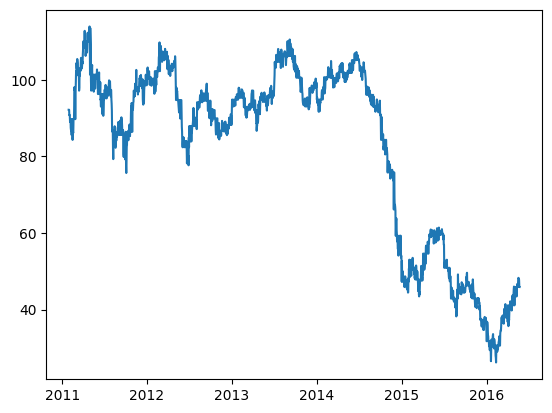

In [602]:
import matplotlib.pyplot as plot
plot.plot(final_data["date"], final_data["wti"])

In [603]:
final_data_path = os.path.join(current_dir, '../data/raw/Dataframe_Final_Data_XGBoost.csv')

final_data.to_csv(final_data_path, index=False)

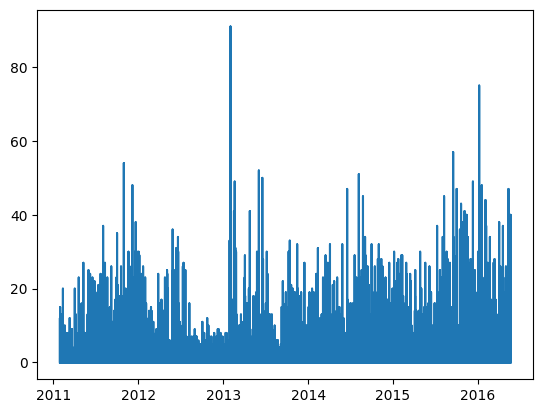

In [604]:
import matplotlib.pyplot as plt

plt.plot(final_data["date"], final_data["sales"])